In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import os

In [2]:
os.chdir("D:\Datathone")

In [3]:
data = pd.read_csv('DrReddy.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2018,2414.399902,2436.750000,2398.350098,2411.500000,2304.435303,19391
1,02-01-2018,2415.100098,2440.000000,2396.699951,2407.699951,2300.803955,28178
2,03-01-2018,2415.000000,2415.000000,2299.000000,2336.199951,2232.478516,76717
3,04-01-2018,2345.000000,2419.899902,2345.000000,2409.500000,2302.524414,50190
4,05-01-2018,2409.500000,2472.649902,2395.000000,2467.350098,2357.805664,70815


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1159 non-null   object 
 1   Open       1159 non-null   float64
 2   High       1159 non-null   float64
 3   Low        1159 non-null   float64
 4   Close      1159 non-null   float64
 5   Adj Close  1159 non-null   float64
 6   Volume     1159 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.5+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1159 non-null   object 
 1   Open       1159 non-null   float64
 2   High       1159 non-null   float64
 3   Low        1159 non-null   float64
 4   Close      1159 non-null   float64
 5   Adj Close  1159 non-null   float64
 6   Volume     1159 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.5+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1159, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,1159): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1099, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 11s - loss: 0.0418 - 11s/epoch - 324ms/step
Epoch 2/20
35/35 - 5s - loss: 0.0065 - 5s/epoch - 141ms/step
Epoch 3/20
35/35 - 5s - loss: 0.0071 - 5s/epoch - 149ms/step
Epoch 4/20
35/35 - 5s - loss: 0.0056 - 5s/epoch - 146ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0051 - 5s/epoch - 150ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0052 - 5s/epoch - 142ms/step
Epoch 7/20
35/35 - 5s - loss: 0.0044 - 5s/epoch - 138ms/step
Epoch 8/20
35/35 - 5s - loss: 0.0045 - 5s/epoch - 140ms/step
Epoch 9/20
35/35 - 5s - loss: 0.0046 - 5s/epoch - 138ms/step
Epoch 10/20
35/35 - 5s - loss: 0.0041 - 5s/epoch - 139ms/step
Epoch 11/20
35/35 - 5s - loss: 0.0036 - 5s/epoch - 139ms/step
Epoch 12/20
35/35 - 5s - loss: 0.0037 - 5s/epoch - 139ms/step
Epoch 13/20
35/35 - 5s - loss: 0.0037 - 5s/epoch - 138ms/step
Epoch 14/20
35/35 - 5s - loss: 0.0038 - 5s/epoch - 144ms/step
Epoch 15/20
35/35 - 5s - loss: 0.0033 - 5s/epoch - 139ms/step
Epoch 16/20
35/35 - 5s - loss: 0.0030 - 5s/epoch - 148ms/step
Epoch 17/20
35/

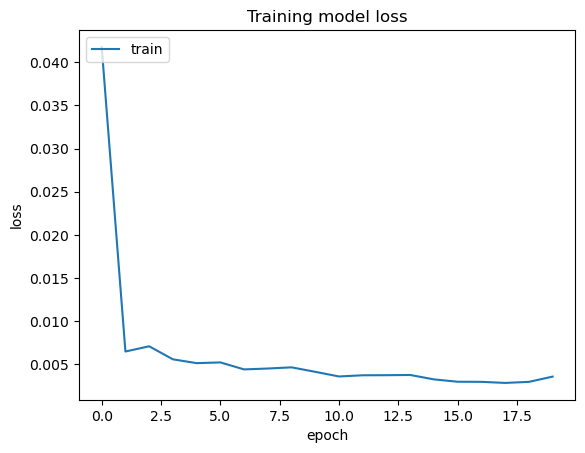

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Testing the data before the corona phase Jan 2018 to Dec 2019

In [13]:
# testing the model from 2018 to 2020

testData = pd.read_csv('DRREDDY_test.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(186, 60, 1)

In [14]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 38ms/step


array([[0.06405713],
       [0.06187584],
       [0.06022825],
       [0.05913565],
       [0.05855373],
       [0.05848654],
       [0.05889592],
       [0.05964038],
       [0.06048824],
       [0.06101626],
       [0.06103431],
       [0.06060827],
       [0.05991226],
       [0.05910378],
       [0.0584721 ],
       [0.05819308],
       [0.05839048],
       [0.05918956],
       [0.06044955],
       [0.06170413],
       [0.06258798],
       [0.06296074],
       [0.06286118],
       [0.06244825],
       [0.06182058],
       [0.06086861],
       [0.05950865],
       [0.05771297],
       [0.05517368],
       [0.05171923],
       [0.04753694],
       [0.04297702],
       [0.03837272],
       [0.03396593],
       [0.02995009],
       [0.02606722],
       [0.02263097],
       [0.01978776],
       [0.01766731],
       [0.01633682],
       [0.01586597],
       [0.01620757],
       [0.0171108 ],
       [0.01819936],
       [0.01910762],
       [0.01986288],
       [0.02042863],
       [0.020

In [15]:
predicted_price = sc.inverse_transform(y_pred)

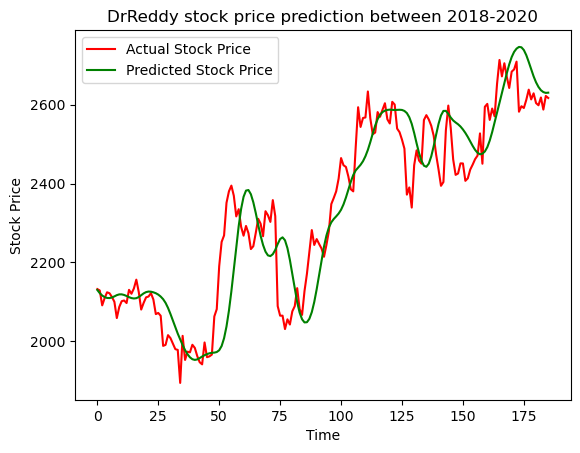

In [16]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('DrReddy stock price prediction between 2018-2020')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Testing the data during the corona phase 2020 to june 2021

In [17]:
# testing the model from 2020 to May 2021

testData2 = pd.read_csv('DrReddy_test2.csv')
testData2["Close"]=pd.to_numeric(testData2.Close,errors='coerce')
testData2 = testData2.dropna()
testData2 = testData2.iloc[:,4:5]
y_test2 = testData2.iloc[60:,0:].values 
#input array for the model
inputClosing = testData2.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test2 = []
length2 = len(testData2)
timestep = 60
for i in range(timestep,length2):  
    X_test2.append(inputClosing_scaled[i-timestep:i,0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2,(X_test2.shape[0],X_test2.shape[1],1))
X_test2.shape

(289, 60, 1)

In [18]:
y_pred2 = model.predict(X_test2)
y_pred2

10/10 [==============================] - 0s 36ms/step


array([[0.26686007],
       [0.2693634 ],
       [0.27599964],
       [0.28653663],
       [0.3001931 ],
       [0.31598356],
       [0.3353116 ],
       [0.35969275],
       [0.3887292 ],
       [0.4212682 ],
       [0.45555052],
       [0.4895968 ],
       [0.5216853 ],
       [0.5494864 ],
       [0.5723285 ],
       [0.5903625 ],
       [0.6036748 ],
       [0.6122391 ],
       [0.61607236],
       [0.61531705],
       [0.6100978 ],
       [0.60145193],
       [0.5907876 ],
       [0.57886475],
       [0.56658703],
       [0.55474484],
       [0.5450825 ],
       [0.53818446],
       [0.53348756],
       [0.5303427 ],
       [0.5279464 ],
       [0.52581906],
       [0.52346104],
       [0.52086675],
       [0.51965594],
       [0.5208297 ],
       [0.52499104],
       [0.5318575 ],
       [0.5407387 ],
       [0.5507156 ],
       [0.5620576 ],
       [0.5739952 ],
       [0.58509856],
       [0.59453505],
       [0.60211855],
       [0.60809183],
       [0.61233157],
       [0.615

In [19]:
predicted_price2 = sc.inverse_transform(y_pred2)

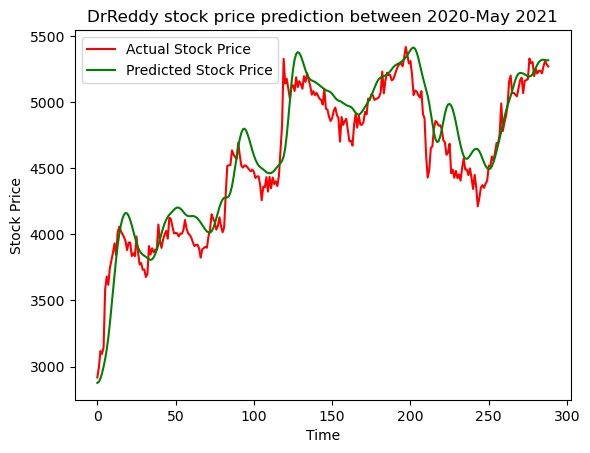

In [20]:
plt.plot(y_test2, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price2, color = 'green', label = 'Predicted Stock Price')
plt.title('DrReddy stock price prediction between 2020-May 2021')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Testing the data After the corona phase june 2021 to Sep 2022

In [21]:
# testing the model from june 2021 to Sep 2022

testData3 = pd.read_csv('DrReddy_test3.csv')
testData3["Close"]=pd.to_numeric(testData3.Close,errors='coerce')
testData3 = testData3.dropna()
testData3 = testData3.iloc[:,4:5]
y_test3 = testData3.iloc[60:,0:].values 
#input array for the model
inputClosing = testData3.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test3 = []
length3 = len(testData3)
timestep = 60
for i in range(timestep,length3):  
    X_test3.append(inputClosing_scaled[i-timestep:i,0])
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3,(X_test3.shape[0],X_test3.shape[1],1))
X_test3.shape

(259, 60, 1)

In [22]:
y_pred3 = model.predict(X_test3)
y_pred3

9/9 [==============================] - 0s 36ms/step


array([[0.80626297],
       [0.7974826 ],
       [0.78885037],
       [0.78210926],
       [0.778544  ],
       [0.77902836],
       [0.7842025 ],
       [0.79403186],
       [0.8076213 ],
       [0.82324356],
       [0.83902174],
       [0.8532892 ],
       [0.8649572 ],
       [0.87341493],
       [0.87876564],
       [0.88112825],
       [0.8804964 ],
       [0.87629396],
       [0.8691735 ],
       [0.8601876 ],
       [0.85012203],
       [0.83977634],
       [0.82990307],
       [0.8214869 ],
       [0.81561446],
       [0.8128914 ],
       [0.813839  ],
       [0.8190191 ],
       [0.8280886 ],
       [0.83935505],
       [0.8504166 ],
       [0.8590397 ],
       [0.8643078 ],
       [0.8663167 ],
       [0.8658761 ],
       [0.86415786],
       [0.8614865 ],
       [0.8575105 ],
       [0.8518001 ],
       [0.84360826],
       [0.8328814 ],
       [0.8205734 ],
       [0.80796957],
       [0.79627633],
       [0.7858405 ],
       [0.777557  ],
       [0.77302545],
       [0.772

In [23]:
predicted_price3 = sc.inverse_transform(y_pred3)

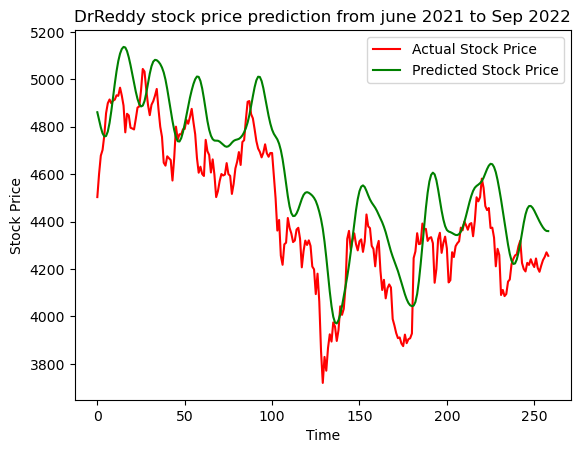

In [24]:
plt.plot(y_test3, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price3, color = 'green', label = 'Predicted Stock Price')
plt.title('DrReddy stock price prediction from june 2021 to Sep 2022')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Forcasting the stock price for next 30 days

In [25]:
df1=data.reset_index()['Close']
# df1

In [26]:
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
print(df1)

[[0.14053181]
 [0.13949918]
 [0.12006956]
 ...
 [0.64047069]
 [0.64568821]
 [0.64166634]]


In [28]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
len(test_data)

406

In [30]:
len(train_data)

753

In [31]:
x_input=test_data[306:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
# temp_input

In [34]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6717009]
101
1 day input [0.65139481 0.6587726  0.62439713 0.60254904 0.61416604 0.59297003
 0.60443757 0.60890779 0.60536147 0.56927407 0.56181474 0.55317331
 0.54733084 0.54815967 0.54121662 0.53818672 0.55140698 0.5415563
 0.5461352  0.54722217 0.55264342 0.63912551 0.64672078 0.66760424
 0.65506334 0.65568829 0.6787185  0.67246841 0.67259075 0.65878614
 0.66207425 0.66305255 0.65613664 0.61082352 0.62651667 0.66081067
 0.66812053 0.64509032 0.65639485 0.66370471 0.6501855  0.61120394
 0.61374476 0.64585115 0.64029409 0.65268559 0.65609591 0.65837852
 0.67400373 0.67091943 0.68086524 0.67663969 0.67157172 0.67802561
 0.67920758 0.66413952 0.68184354 0.70881402 0.70412645 0.70892269
 0.7301323  0.71969727 0.698746   0.6941127  0.69650412 0.67355539
 0.673963   0.66245466 0.62966892 0.64973715 0.6426311  0.5967473
 0.6025761  0.59552446 0.59790221 0.61210077 0.61458719 0.63207387
 0.63806574 0.64207395 0.64345987 0.65287573 0.65904434 0.63348685
 0.62653034 0.62379925 0.63362272 0.

8 day output [[0.7311351]]
9 day input [0.60536147 0.56927407 0.56181474 0.55317331 0.54733084 0.54815967
 0.54121662 0.53818672 0.55140698 0.5415563  0.5461352  0.54722217
 0.55264342 0.63912551 0.64672078 0.66760424 0.65506334 0.65568829
 0.6787185  0.67246841 0.67259075 0.65878614 0.66207425 0.66305255
 0.65613664 0.61082352 0.62651667 0.66081067 0.66812053 0.64509032
 0.65639485 0.66370471 0.6501855  0.61120394 0.61374476 0.64585115
 0.64029409 0.65268559 0.65609591 0.65837852 0.67400373 0.67091943
 0.68086524 0.67663969 0.67157172 0.67802561 0.67920758 0.66413952
 0.68184354 0.70881402 0.70412645 0.70892269 0.7301323  0.71969727
 0.698746   0.6941127  0.69650412 0.67355539 0.673963   0.66245466
 0.62966892 0.64973715 0.6426311  0.5967473  0.6025761  0.59552446
 0.59790221 0.61210077 0.61458719 0.63207387 0.63806574 0.64207395
 0.64345987 0.65287573 0.65904434 0.63348685 0.62653034 0.62379925
 0.63362272 0.63127217 0.63773973 0.63252222 0.62885369 0.63866363
 0.62768525 0.62339163 

16 day output [[0.8025441]]
17 day input [0.55140698 0.5415563  0.5461352  0.54722217 0.55264342 0.63912551
 0.64672078 0.66760424 0.65506334 0.65568829 0.6787185  0.67246841
 0.67259075 0.65878614 0.66207425 0.66305255 0.65613664 0.61082352
 0.62651667 0.66081067 0.66812053 0.64509032 0.65639485 0.66370471
 0.6501855  0.61120394 0.61374476 0.64585115 0.64029409 0.65268559
 0.65609591 0.65837852 0.67400373 0.67091943 0.68086524 0.67663969
 0.67157172 0.67802561 0.67920758 0.66413952 0.68184354 0.70881402
 0.70412645 0.70892269 0.7301323  0.71969727 0.698746   0.6941127
 0.69650412 0.67355539 0.673963   0.66245466 0.62966892 0.64973715
 0.6426311  0.5967473  0.6025761  0.59552446 0.59790221 0.61210077
 0.61458719 0.63207387 0.63806574 0.64207395 0.64345987 0.65287573
 0.65904434 0.63348685 0.62653034 0.62379925 0.63362272 0.63127217
 0.63773973 0.63252222 0.62885369 0.63866363 0.62768525 0.62339163
 0.63056562 0.63680217 0.64047069 0.64568821 0.64166634 0.67170089
 0.67442024 0.67903823

24 day output [[0.85667574]]
25 day input [0.65506334 0.65568829 0.6787185  0.67246841 0.67259075 0.65878614
 0.66207425 0.66305255 0.65613664 0.61082352 0.62651667 0.66081067
 0.66812053 0.64509032 0.65639485 0.66370471 0.6501855  0.61120394
 0.61374476 0.64585115 0.64029409 0.65268559 0.65609591 0.65837852
 0.67400373 0.67091943 0.68086524 0.67663969 0.67157172 0.67802561
 0.67920758 0.66413952 0.68184354 0.70881402 0.70412645 0.70892269
 0.7301323  0.71969727 0.698746   0.6941127  0.69650412 0.67355539
 0.673963   0.66245466 0.62966892 0.64973715 0.6426311  0.5967473
 0.6025761  0.59552446 0.59790221 0.61210077 0.61458719 0.63207387
 0.63806574 0.64207395 0.64345987 0.65287573 0.65904434 0.63348685
 0.62653034 0.62379925 0.63362272 0.63127217 0.63773973 0.63252222
 0.62885369 0.63866363 0.62768525 0.62339163 0.63056562 0.63680217
 0.64047069 0.64568821 0.64166634 0.67170089 0.67442024 0.67903823
 0.6854533  0.69332093 0.70219755 0.71166271 0.72138321 0.73113507
 0.74078614 0.7502696

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [36]:
len(df1)

1159

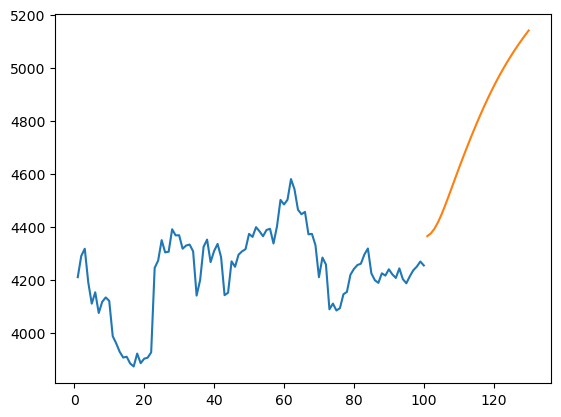

In [37]:
plt.plot(day_new,sc.inverse_transform(df1[1059:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

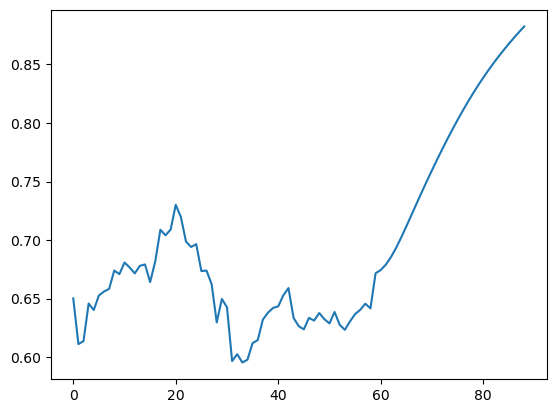

In [38]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])

In [39]:
df3=sc.inverse_transform(df3).tolist()

Text(0, 0.5, 'Stock Price')

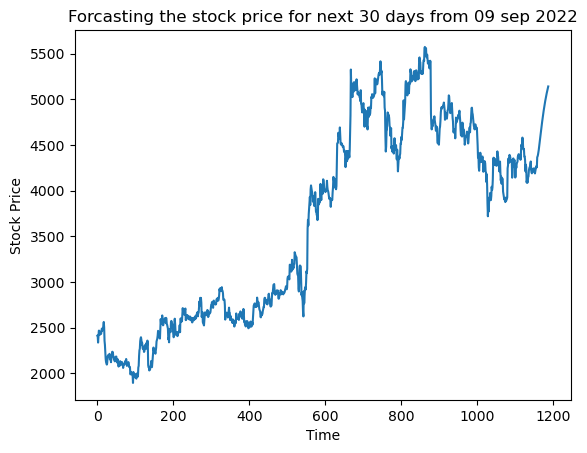

In [40]:
plt.plot(df3)
plt.title('Forcasting the stock price for next 30 days from 09 sep 2022')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Forcasting the trends if corona phase was not present 

In [41]:
# testData.tail()

In [42]:
dff=testData.reset_index()['Close']
# dff

In [43]:
dff=sc.fit_transform(np.array(dff).reshape(-1,1))

In [44]:
# print(dff)

In [45]:
training_size2=int(len(dff)*0.85)
test_size2=len(dff)-training_size2
train_data2,test_data2=dff[0:training_size2,:],dff[training_size2:len(dff),:1]

In [46]:
training_size2,test_size2

(209, 37)

In [47]:
x_input2=test_data2[27:].reshape(1,-1)
x_input2.shape

(1, 10)

In [48]:
temp_input2=list(x_input2)
temp_input2=temp_input2[0].tolist()

In [49]:
temp_input2

[0.8764955654060334,
 0.9081196718063493,
 0.8778998960881719,
 0.8967643023134984,
 0.8665445265953209,
 0.8597679109991634,
 0.8838826815217495,
 0.8463368995688625,
 0.8885225452994501,
 0.8823564302228517]

In [50]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output2=[]
n_steps2=10
i=0
while(i<30):
    
    if(len(temp_input2)>10):
        #print(temp_input)
        x_input2=np.array(temp_input2[1:])
        print("{} day input {}".format(i,x_input2))
        x_input2=x_input2.reshape(1,-1)
        x_input2 = x_input2.reshape((1, n_steps2, 1))
        #print(x_input)
        yhat2 = model.predict(x_input2, verbose=0)
        print("{} day output {}".format(i,yhat2))
        temp_input2.extend(yhat2[0].tolist())
        temp_input2=temp_input2[1:]
        #print(temp_input)
        lst_output2.extend(yhat2.tolist())
        i=i+1
    else:
        x_input2 = x_input2.reshape((1, n_steps2,1))
        yhat2 = model.predict(x_input2, verbose=0)
        print(yhat2[0])
        temp_input2.extend(yhat2[0].tolist())
        print(len(temp_input2))
        lst_output2.extend(yhat2.tolist())
        i=i+1
    

print(lst_output2)

[1.0254419]
11
1 day input [0.90811967 0.8778999  0.8967643  0.86654453 0.85976791 0.88388268
 0.8463369  0.88852255 0.88235643 1.02544188]
1 day output [[1.0286477]]
2 day input [0.8778999  0.8967643  0.86654453 0.85976791 0.88388268 0.8463369
 0.88852255 0.88235643 1.02544188 1.02864766]
2 day output [[1.0408899]]
3 day input [0.8967643  0.86654453 0.85976791 0.88388268 0.8463369  0.88852255
 0.88235643 1.02544188 1.02864766 1.04088986]
3 day output [[1.0639181]]
4 day input [0.86654453 0.85976791 0.88388268 0.8463369  0.88852255 0.88235643
 1.02544188 1.02864766 1.04088986 1.06391811]
4 day output [[1.0949154]]
5 day input [0.85976791 0.88388268 0.8463369  0.88852255 0.88235643 1.02544188
 1.02864766 1.04088986 1.06391811 1.09491539]
5 day output [[1.1321129]]
6 day input [0.88388268 0.8463369  0.88852255 0.88235643 1.02544188 1.02864766
 1.04088986 1.06391811 1.09491539 1.13211286]
6 day output [[1.1720767]]
7 day input [0.8463369  0.88852255 0.88235643 1.02544188 1.02864766 1.0408

In [51]:
day_new2=np.arange(1,11)
day_pred2=np.arange(11,41)

In [52]:
len(dff)

246

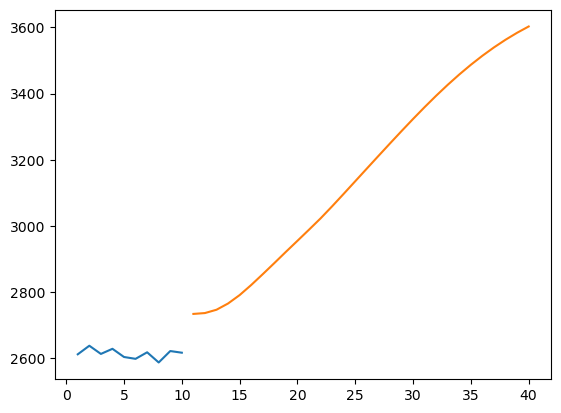

In [53]:
plt.plot(day_new2,sc.inverse_transform(dff[236:]))
plt.plot(day_pred2,sc.inverse_transform(lst_output2))

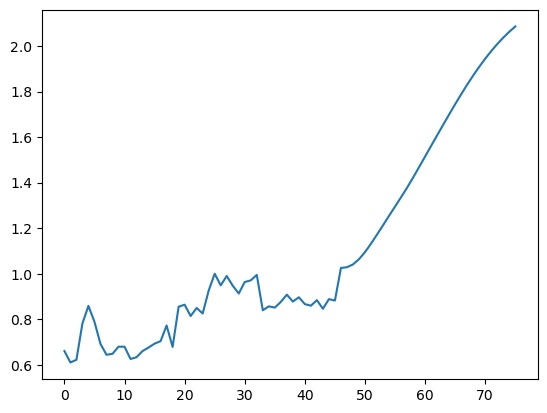

In [54]:
dff1=dff.tolist()
dff1.extend(lst_output2)
plt.plot(dff1[200:])

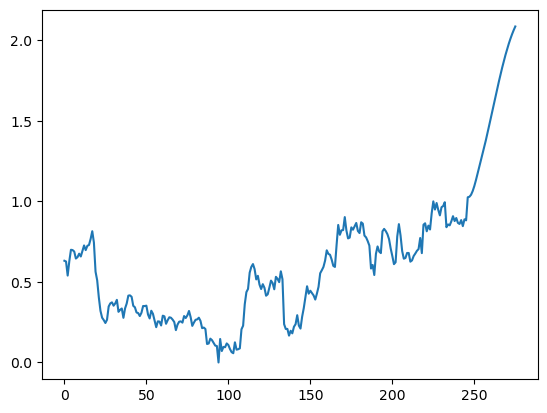

In [55]:
plt.plot(dff1)